In [149]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [89]:
dataset='./fake or real.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [90]:
path,dirs,files=next(os.walk('./fake or real'))
file_count=len(files)
print('Number of images is: ',file_count)

Number of images is:  20000


In [91]:
path='./fake or real'
data_dir=[]
for image in os.listdir(path):
    data_dir.append(os.path.join(path,image))

In [92]:
data_dir[:5]

['./fake or real\\fake (1).jpg',
 './fake or real\\fake (10).jpg',
 './fake or real\\fake (100).jpg',
 './fake or real\\fake (1000).jpg',
 './fake or real\\fake (10000).jpg']

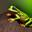

In [93]:
Image.open(data_dir[0])

In [94]:
fake_data_dir=[]
real_data_dir=[]
for image in data_dir:
    if 'fake' in image.split('\\')[1]:
        fake_data_dir.append(image)
    else:
        real_data_dir.append(image)

In [95]:
len(fake_data_dir)

10000

In [96]:
len(real_data_dir)

10000

In [97]:
fake_data_dir[:5]

['./fake or real\\fake (1).jpg',
 './fake or real\\fake (10).jpg',
 './fake or real\\fake (100).jpg',
 './fake or real\\fake (1000).jpg',
 './fake or real\\fake (10000).jpg']

In [98]:
real_data_dir[:5]

['./fake or real\\real (1).jpg',
 './fake or real\\real (10).jpg',
 './fake or real\\real (100).jpg',
 './fake or real\\real (1000).jpg',
 './fake or real\\real (10000).jpg']

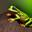

In [99]:
Image.open(fake_data_dir[0])

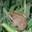

In [100]:
Image.open(real_data_dir[0])

In [101]:
X,y=[],[]
for image in data_dir:
    img=cv2.imread(image)
    resized_img=cv2.resize(img,(32,32))
    X.append(resized_img)
    if 'fake' in image.split('\\')[1]:
        y.append(0)
    else:
        y.append(1)

In [102]:
len(X)

20000

In [103]:
len(y)

20000

In [104]:
X[0]

array([[[ 62,  59,  75],
        [ 60,  59,  75],
        [ 59,  60,  74],
        ...,
        [  8, 184, 117],
        [  0, 186, 117],
        [  0, 186, 117]],

       [[ 59,  59,  75],
        [ 57,  60,  75],
        [ 55,  61,  74],
        ...,
        [  8, 180, 114],
        [  3, 181, 114],
        [  0, 182, 114]],

       [[ 52,  61,  75],
        [ 50,  61,  75],
        [ 46,  62,  74],
        ...,
        [ 11, 176, 109],
        [  9, 176, 109],
        [  8, 176, 109]],

       ...,

       [[ 76,  81, 114],
        [ 70,  77, 110],
        [ 61,  68, 101],
        ...,
        [ 57,  63,  86],
        [ 54,  71,  97],
        [ 33,  58,  84]],

       [[ 64,  77, 115],
        [ 57,  71, 107],
        [ 52,  66, 102],
        ...,
        [ 54,  59,  84],
        [ 69,  77, 106],
        [ 56,  66,  96]],

       [[ 51,  70, 108],
        [ 43,  62, 100],
        [ 45,  61,  98],
        ...,
        [ 60,  64,  92],
        [ 63,  66,  97],
        [ 58,  60,  94]]

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [106]:
len(X_train)

16000

In [107]:
len(X_test)

4000

In [108]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [109]:
X_train.shape

(16000, 32, 32, 3)

In [110]:
X_test.shape

(4000, 32, 32, 3)

In [111]:
X_train=X_train/255
X_test=X_test/255

In [112]:
X_train[0]

array([[[0.94117647, 0.97254902, 0.96862745],
        [0.94901961, 0.98039216, 0.97647059],
        [0.96862745, 0.98823529, 0.98431373],
        ...,
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ]],

       [[0.94117647, 0.97254902, 0.96862745],
        [0.94901961, 0.98039216, 0.97647059],
        [0.96862745, 0.98823529, 0.98431373],
        ...,
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ]],

       [[0.94117647, 0.97254902, 0.96862745],
        [0.94901961, 0.98039216, 0.97647059],
        [0.96862745, 0.98823529, 0.98431373],
        ...,
        [0.98823529, 0.99607843, 0.99607843],
        [0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ]],

       ...,

       [[0.26666667, 0.43921569, 0.43529412],
        [0.26666667, 0.43921569, 0.43529412],
        [0.27058824, 0

In [139]:
model=Sequential()

In [140]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3))),
model.add(MaxPooling2D()),
model.add(Conv2D(64,(3,3),padding='same',activation='relu')),
model.add(MaxPooling2D()),
model.add(Conv2D(32,(3,3),padding='same',activation='relu')),
model.add(MaxPooling2D()),
model.add(Conv2D(32,(3,3),padding='same',activation='relu')),
model.add(MaxPooling2D()),
model.add(Conv2D(16,(3,3),padding='same',activation='relu')),
model.add(MaxPooling2D()),
model.add(Flatten()),
model.add(Dense(200,activation='relu')),
model.add(Dense(100,activation='relu')),
model.add(Dense(1,activation='sigmoid'))

In [141]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [142]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.7000 - loss: 0.5457
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8622 - loss: 0.3217
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8837 - loss: 0.2751
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9055 - loss: 0.2386
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9136 - loss: 0.2097
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9186 - loss: 0.2025
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9289 - loss: 0.1828
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9325 - loss: 0.1637
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9399 - loss: 0.1468
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9478 - loss: 0.1390


In [143]:
model.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9183 - loss: 0.2168


[0.24853569269180298, 0.906000018119812]

In [144]:
y_predict=model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [145]:
y_predict[:5]

array([[9.9940890e-01],
       [1.4512956e-03],
       [9.5243547e-07],
       [9.2031193e-01],
       [9.4889393e-03]], dtype=float32)

In [146]:
y_pred=np.where(y_predict>0.5,1,0)

In [147]:
y_pred[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [148]:
y_test[:5]

array([1, 0, 0, 1, 0])

In [150]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2272
           1       0.84      0.97      0.90      1728

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.92      0.91      0.91      4000



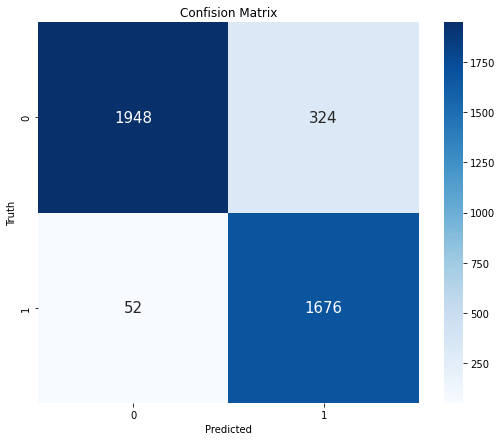

In [151]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confision Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()